In [11]:
# vd1: Source code cho các tham số và hàm cơ bản trong GA
import numpy as np
import matplotlib.pyplot as plt
n = 10
m = 100
N_GENERATIONS = 400

CROSS_RATE = 0.9
MUTATION_RATE = 0.05
BOUND = 100
def sphere_function(x):
    return np.sum(x*x, axis=1)
def compute_fitness(pred):
    return 1/(pred + 1)
def select(pop, fitness):
    idx = np.random.choice(np.arange(m), size=m, replace=True, p=fitness/fitness.sum())
    return pop[idx]
def crossover(s1,s2):
    crossover_prob = np.random.rand((n))
    crossover_mask = crossover_prob < CROSS_RATE
    # save s1
    buffer = s1.copy()
    # mating and produce one child
    s1[crossover_mask] = s2[crossover_mask]
    s2[crossover_mask] = buffer[crossover_mask]
    return (s1,s2)

def mutate(child):
    mutate_vector = (np.random.random(size=n)-0.5)*BOUND
    mutate_prob = np.random.rand((n))
    mutate_mask = mutate_prob < MUTATION_RATE
    child[mutate_mask] = mutate_vector[mutate_mask]
    return child


In [15]:
# Tìm min cho hàm sphere
# initialize the population
import numpy as np
pop = (np.random.random(size=(m,n))-0.5)*BOUND
# to print losses
losses = []
# evolution
for i in range(N_GENERATIONS):
    # compute function value
    cost_values = sphere_function(pop)
    # compute_fitness
    fitness = compute_fitness(cost_values)
    if i%1 == 0:
        #print("Cost: ",np.min(cost_values))
        losses.append(np.min(cost_values))
        # print(pop[np.argmax(fitness), :])
    pop = select(pop, fitness)
    parent_pop = pop.copy()
    for i in range(m//2 - 2):
        k1 = np.random.randint(0,m,size=1)
        k2 = np.random.randint(0,m,size=1)
        s1 = parent_pop[k1].copy()[0]
        s2 = parent_pop[k2].copy()[0]
        s1,s2 = crossover(s1,s2)
        s1 = mutate(s1)
        s2 = mutate(s2)
        # parent is relaced ny its child
        pop[i*2][:] = s1
        pop[i*2+1][:] = s2
    # elitism
    two_best = fitness.argsort()[-2:]
    pop[m-2][:2] = parent_pop[two_best[0]].copy()[0]
    pop[m-1][:2] = parent_pop[two_best[1]].copy()[0]
    


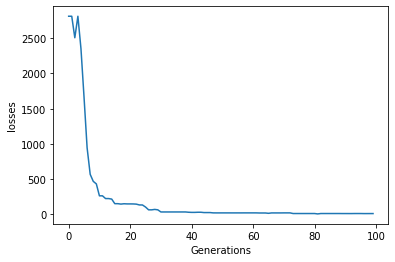

In [17]:
    import matplotlib.pyplot as plt
    plt.plot(losses[:100])
    plt.xlabel("Generations")
    plt.ylabel("losses")
    plt.show()
    

In [ ]:
# Phương pháp sum ò difference (SAD) cho stereo matching
import numpy as np
from PIL import Image
def stereo_matching_sad(left_img, right_img, kernel_size, disparity_range):
    # Đọc ả trái và ảnh phải, rồi chuyển samg grayscale
    left_img = Image.open(left_img).convert("L")
    left = np.asarray(left_img)
    
    right_img = Image.open(right_img).convert("L")
    right = np.asarray(right_img)
    # Lấy chiều rộng và chiều cao của ảnh
    height, width = left.shape
    # Tạo disparity map
    depth = np.zeros((height, width), np.uint8)
    kernel_half = int((kernel_size-1)/2)
    scale = 255 / disparity_range
    
    memory = np.ones((height, width))
    for j in range(kernel_half, height- kernel_half):
        print(".",end = " ")
        data = np.ones((height,width))
        for y in range(kernel_half, height-kernel_half):
            for x in range(kernel_half, width - kernel_half):
                if(x - j >= 0):
                    data[y,x] = abs(int(left[y,x]) - int(right[y,x-j]))/255.0
                    
        # tinh sum-area table
        memory[j] = data.cumsum(axis=0).cumsum(axis=1)
    for y in range(kernel_half, height - kernel_half):
        for x in range(kernel_half, width - kernel_half):
            # add constraint for x0=y0=0
            x0 = x - kernel_half
            x1 = x + kernel_half
            y0 = y - kernel_half
            y1 = y + kernel_half
            # tìm  j tại đó cost có giá trị min
            disparity = 0
            cost_min = 65534
            for j in range(disparity_range):
                a = memory[j, y0 -1, x0 - 1]
                b = memory[j, y1, x0 -1]
                c = memory[j, y0 -1, x1]
                d = memory[j,y1], x1
                if sad < cost_min:
                    cost_min = sad
                    disparity = j
            # gan j cho cost_min vao disparity map
            depth[y,x] = int(disparity*scale)
            
    # chuyển dữ liệu từ ndarray sang kiểu Imange và lưu xuống file
    Image.formarray(depth).save ("disparity_map_sad.png")
    
kernel_size = 9
stereo_matching_sad("Aloe_left_1.png","Aloe_right_1.png", kernel_size, 64)